# Estimación e Intervalos de confianza (IC)

In [1]:
library(readr)
library(readxl)
library(ggplot2)

* Se tiene una muestra de 146 estudiantes de escuelas medias sobre los que se relevó información. Se considera que esta muestra representa a los estudiantes de una población

In [26]:
setwd("/Users/ppando/Materias/data/materias/estadistica/R")
estudiantes<- read_xlsx("estudiantes2025.xlsx")
str(estudiantes)
summary(estudiantes)          # hay variables no numéricas y convertimos a factor
estudiantes<-estudiantes[,-1] # se saca ID, no es una variable
estudiantes$sexo<-as.factor(estudiantes$sexo)
estudiantes$colegio<-as.factor(estudiantes$colegio)
estudiantes$clases<-as.factor(estudiantes$clases)
summary(estudiantes)

tibble [146 × 6] (S3: tbl_df/tbl/data.frame)
 $ ID     : num [1:146] 1 2 3 4 5 6 7 8 9 10 ...
 $ sexo   : chr [1:146] "Femenino" "Femenino" "Femenino" "Femenino" ...
 $ edad   : num [1:146] 17.1 18.7 16.3 19.1 21.4 ...
 $ colegio: chr [1:146] "Privado" "Publico" "Publico" "Publico" ...
 $ clases : chr [1:146] "Virtual" "Presencial" "Virtual" "Presencial" ...
 $ nota   : num [1:146] 5.1 4.5 3.5 5.9 6.6 6.6 4 6.5 6.3 4.5 ...


       ID             sexo                edad         colegio         
 Min.   :  1.00   Length:146         Min.   :16.04   Length:146        
 1st Qu.: 37.25   Class :character   1st Qu.:17.22   Class :character  
 Median : 73.50   Mode  :character   Median :18.55   Mode  :character  
 Mean   : 73.50                      Mean   :18.89                     
 3rd Qu.:109.75                      3rd Qu.:20.39                     
 Max.   :146.00                      Max.   :28.76                     
    clases               nota      
 Length:146         Min.   :3.500  
 Class :character   1st Qu.:5.700  
 Mode  :character   Median :6.550  
                    Mean   :6.516  
                    3rd Qu.:7.475  
                    Max.   :9.900  

        sexo         edad          colegio          clases         nota      
 Femenino :86   Min.   :16.04   Privado:71   Presencial:100   Min.   :3.500  
 Masculino:60   1st Qu.:17.22   Publico:75   Virtual   : 46   1st Qu.:5.700  
                Median :18.55                                 Median :6.550  
                Mean   :18.89                                 Mean   :6.516  
                3rd Qu.:20.39                                 3rd Qu.:7.475  
                Max.   :28.76                                 Max.   :9.900  

## Estimación puntual de parámetros

In [7]:
# Qué parámetros estimamos para nota? y edad? 
mean(estudiantes$nota)
sd(estudiantes$nota)
var(estudiantes$nota)

[1] 6.516438

[1] 1.283477

[1] 1.647314

In [6]:
## Intervalos de confianza

* Antes tenemos que decidir si puede suponerse una distribución normal para "nota"
* ¿se puede asumir que los datos provienen de una distribución normal?

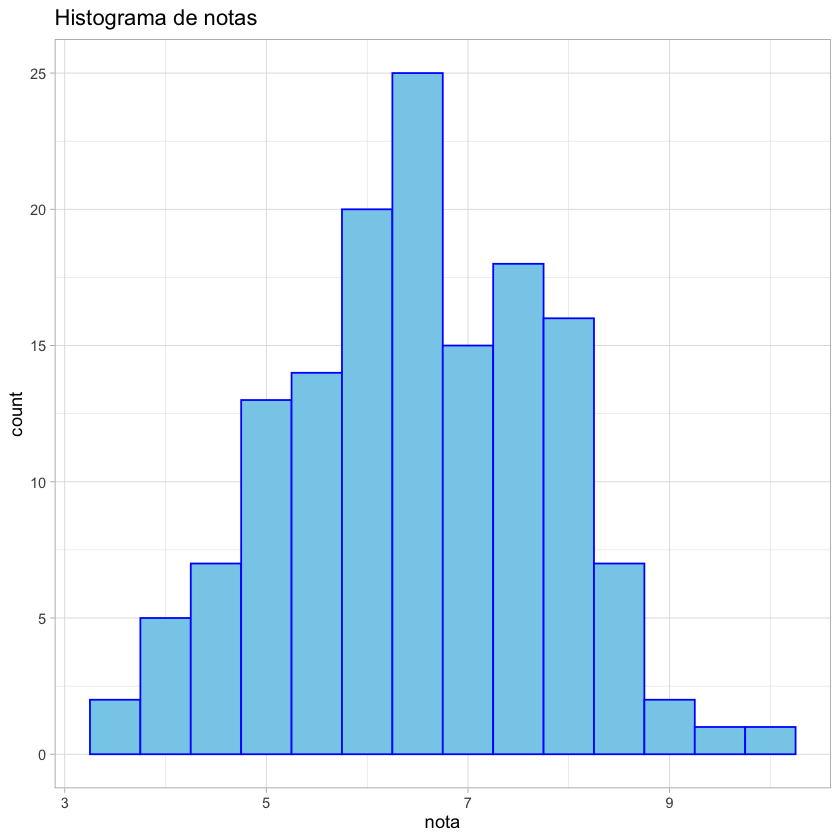

In [10]:
ggplot(estudiantes, aes(x = nota)) + 
  geom_histogram(aes(x=nota), binwidth=0.5, fill = "skyblue", color = "blue") +
  labs(title="Histograma de notas") +
  theme_light()

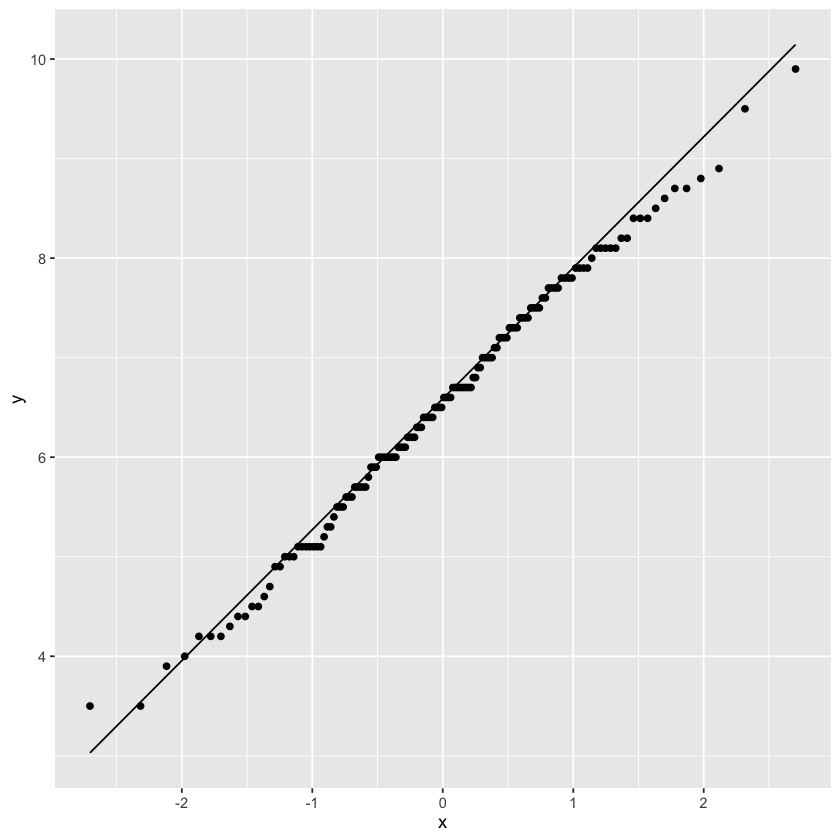

In [11]:
ggplot(estudiantes, aes(sample = nota)) +
  geom_qq() +
  geom_qq_line()

* IC del 95% para media de notas

In [12]:
IC_mu_95 <- t.test(x=estudiantes$nota, conf.level=0.95)
IC_mu_95


	One Sample t-test

data:  estudiantes$nota
t = 61.348, df = 145, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.306496 6.726381
sample estimates:
mean of x 
 6.516438 


* Tengo una confianza del 95% de que la nota media esté entre 6.3 y 6.72

In [ ]:
* IC para subgrupos dentro de la muestra: colegio privado y público

In [20]:
privado <- estudiantes[estudiantes$colegio=="Privado", ]
t.test(x=privado$nota, conf.level=0.95)


	One Sample t-test

data:  privado$nota
t = 41.594, df = 70, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 5.999255 6.603562
sample estimates:
mean of x 
 6.301408 


In [22]:
publico <- estudiantes[estudiantes$colegio=="Publico", ]
t.test(x=publico$nota, conf.level=0.95)


	One Sample t-test

data:  publico$nota
t = 46.009, df = 74, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 6.42897 7.01103
sample estimates:
mean of x 
     6.72 


* IC para una proporción (puede usarse cuando n grande)

In [16]:
t= table(estudiantes$clases)
t/146
prop.test(46, 146,conf.level=0.95)


Presencial    Virtual 
 0.6849315  0.3150685 


	1-sample proportions test with continuity correction

data:  46 out of 146, null probability 0.5
X-squared = 19.24, df = 1, p-value = 1.153e-05
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.2421559 0.3978877
sample estimates:
        p 
0.3150685 


* IC para DIFERENCIA DE MEDIAS independientes

In [24]:
t.test(x=privado$nota,y=publico$nota, conf.level=0.95)$conf.int
t.test(x=privado$nota,y=publico$nota, conf.level=0.95)$estimate

[1] -0.834556702 -0.002626397
attr(,"conf.level")
[1] 0.95

mean of x mean of y 
 6.301408  6.720000

* IC para DIFERENCIA DE MEDIAS APAREADAS

In [25]:
datos<-read_xlsx("presion_antesydespues.xlsx")
summary(datos)
t.test(x = datos$despues, y = datos$antes, paired = TRUE, conf.level = 0.95)

     Sujeto          antes          despues     
 Min.   : 1.00   Min.   :106.0   Min.   :113.0  
 1st Qu.: 5.75   1st Qu.:113.2   1st Qu.:117.0  
 Median :10.50   Median :119.5   Median :123.5  
 Mean   :10.50   Mean   :120.7   Mean   :124.6  
 3rd Qu.:15.25   3rd Qu.:129.2   3rd Qu.:132.5  
 Max.   :20.00   Max.   :140.0   Max.   :139.0  


	Paired t-test

data:  datos$despues and datos$antes
t = 1.3979, df = 19, p-value = 0.1783
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -1.939381  9.739381
sample estimates:
mean difference 
            3.9 
